# MECSim plotter

Plotter for ``MECSimOutput_Pot.txt`` format files.

Output the current against time and against voltage as 2 sets of images. Each is output as PNG, PS and PDF in a clear format for inclusion in scientific journal articles.

## Script parameters

General parameters

In [10]:
# MECSim output filename
filename = '../MECSimOutput_Pot.txt'
# output to screen (useful if interactive)
iOutputToScreen = True
# output plots to screen (useful if interactive)
plotInteractive = True


### Load packages

In [11]:
if(plotInteractive):
    %matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sys

Double check that interactive plotting mode is disabled if running this in script mode

In [12]:
thisCodeName = 'MECSimPlotter.py'
nLength = len(thisCodeName)
tailString = sys.argv[0]
tailString = tailString[-nLength:]
if(tailString==thisCodeName):
    plotInteractive = False
    # next should be the file name
    filename = sys.argv[1]


## Define functions

Load MECSim output file

In [13]:
def ReadMECSimOut(filename):
    f = open(filename, 'r')
    # search for last line of header that is made by MECSim (always this line)
    for line in f:
        if line.strip() == "Post(ms):       0.000000E+00": break
    time = []
    eapp = []
    current = []
    for line in f:
        columns = line.split()
        time.append(float(columns[0]))
        eapp.append(float(columns[1]))
        current.append(float(columns[2]))
    return np.asfarray(time), np.asfarray(eapp), np.asfarray(current)

## Read MECSim output file

In [14]:
eapp, current, time = ReadMECSimOut(filename)

## Plot current against time

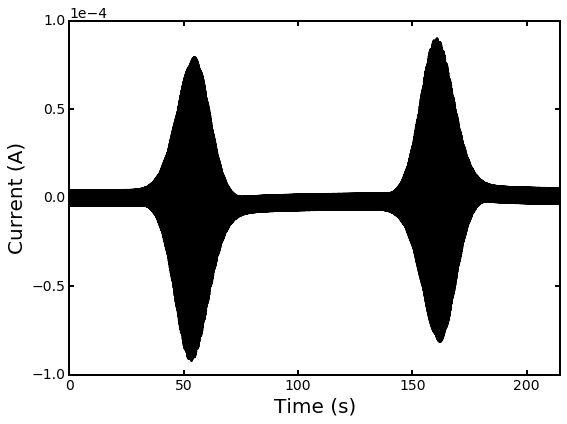

In [15]:
plt.figure(figsize=(8,6),dpi=100)
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['xtick.minor.width'] = 2
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['ytick.minor.width'] = 2
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
plt.plot(time, current, 'k')#, label='A', linewidth=2)
plt.xlim([0,time[-1]])
plt.xlabel('Time (s)', fontsize=20)
plt.ylabel('Current (A)', fontsize=20)
plt.tight_layout()
plt.savefig('MECSimOutputCt.png')
plt.savefig('MECSimOutputCt.ps')
plt.savefig('MECSimOutputCt.pdf')

## Plot current against applied voltage

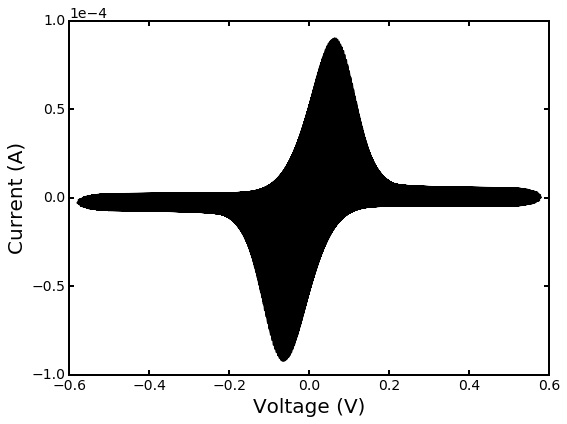

In [16]:
plt.figure(figsize=(8,6),dpi=100)
plt.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
plt.plot(eapp, current, 'k')#, label='A', linewidth=2)
plt.xlabel('Voltage (V)', fontsize=20)
plt.ylabel('Current (A)', fontsize=20)
plt.tight_layout()
plt.savefig('MECSimOutputCV.png')
plt.savefig('MECSimOutputCV.ps')
plt.savefig('MECSimOutputCV.pdf')